In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from ucimlrepo import fetch_ucirepo

In [2]:
bank_marketing = fetch_ucirepo(id=222)

In [3]:
df_features = bank_marketing.data.features
display(df_features, df_features.describe(include='all'), df_features.dtypes)

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  campaign  pdays  previous  \
0            NaN            5   may       261         1     -1         0   
1            NaN            5   may       151         1     -1         0   
2            NaN            5   may        76         1     -1         0   
3            NaN            5   may        92         1     -1         0   
4            NaN            5   may       198         1     -1         0   
...          ...          ...   ...       ...       ...    ...       ...   
45206   cellular           17   nov       977         3     -1         0   
45207   cellular           17   nov       456         2     -1         0   
45208   cellular           17   nov      1127         5    184         3   
45209  telephone           17   nov       508         4     -1         0   
45210   cellular           17   nov       361         2    188        11   

      poutcome  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
45206      NaN  
45207      NaN  
45208  success  
45209      NaN  
45210    other  

[45211 rows x 16 columns]

age          job  marital  education default        balance  \
count   45211.000000        44923    45211      43354   45211   45211.000000   
unique           NaN           11        3          3       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact   day_of_week  month      duration  \
count    45211  45211     32191  45211.000000  45211  45211.000000   
unique       2      2         2           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome  
count   45211.000000  45211.000000  45211.000000     8252  
unique           NaN           NaN           NaN        3  
top              NaN           NaN           NaN  failure  
freq             NaN           NaN           NaN     4901  
mean        2.763841     40.197828      0.580323      NaN  
std         3.098021    100.128746      2.303441      NaN  
min         1.000000     -1.000000      0.000000      NaN  
25%         1.000000     -1.000000      0.000000      NaN  
50%         2.000000     -1.000000      0.000000      NaN  
75%         3.000000     -1.000000      0.000000      NaN  
max        63.000000    871.000000    275.000000      NaN

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

In [4]:
df_label = bank_marketing.data.targets
display(df_label, df_label.describe(include='all'), df_label.dtypes)
###################################################################
###                                                             ###
###                          y LABEL                            ###
###                                                             ###
###       Wir wollen herausfinden ob die clients subscriben     ###
###                                                             ###
###################################################################

y
0       no
1       no
2       no
3       no
4       no
...    ...
45206  yes
45207  yes
45208  yes
45209   no
45210   no

[45211 rows x 1 columns]

y
count   45211
unique      2
top        no
freq    39922

y    object
dtype: object

In [5]:
#df_features['age'] = df_feature['age'].to_numpy(dtype=np.int8)
#df_features['balance'] = df_feature['balance'].to_numpy(dtype=np.int32)
#ary_duration = df_feature['duration'].to_numpy(dtype=np.int32)
df_features['y'] = (df_label['y'] == 'yes').astype(dtype=int)
df_features['education'] = df_features['education'].replace([None, 'secondary', 'primary', 'tertiary'], [0, 1, 2, 3])
df_features.corr()

/tmp/ipykernel_12188/530988890.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_features.corr()


age  education   balance  day_of_week  duration  campaign  \
age          1.000000  -0.019044  0.097783    -0.009120 -0.004648  0.004760   
education   -0.019044   1.000000  0.073295     0.013607 -0.000389  0.014960   
balance      0.097783   0.073295  1.000000     0.004503  0.021560 -0.014578   
day_of_week -0.009120   0.013607  0.004503     1.000000 -0.030206  0.162490   
duration    -0.004648  -0.000389  0.021560    -0.030206  1.000000 -0.084570   
campaign     0.004760   0.014960 -0.014578     0.162490 -0.084570  1.000000   
pdays       -0.023758  -0.012525  0.003435    -0.093044 -0.001565 -0.088628   
previous     0.001288   0.017587  0.016674    -0.051710  0.001203 -0.032855   
y            0.025155   0.046539  0.052838    -0.028348  0.394521 -0.073172   

                pdays  previous         y  
age         -0.023758  0.001288  0.025155  
education   -0.012525  0.017587  0.046539  
balance      0.003435  0.016674  0.052838  
day_of_week -0.093044 -0.051710 -0.028348  
duration    -0.001565  0.001203  0.394521  
campaign    -0.088628 -0.032855 -0.073172  
pdays        1.000000  0.454820  0.103621  
previous     0.454820  1.000000  0.093236  
y            0.103621  0.093236  1.000000

In [6]:
#duration npdays previous

#make model with dynamic features

In [7]:
# Calculate the percentage of missing values for each feature

def plot_missing_vales(df: pd.DataFrame):

    df_isNaN = df.isna().sum()
    print(df_isNaN)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_isNaN.index, y=df_isNaN.values, palette="viridis")
    plt.title("Percentage of Missing Values by Feature in Payday Dataset", fontsize=16)
    plt.ylabel("Percentage of Missing Values", fontsize=14)
    plt.xlabel("Features", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

age                0
job              288
marital            0
education          0
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64


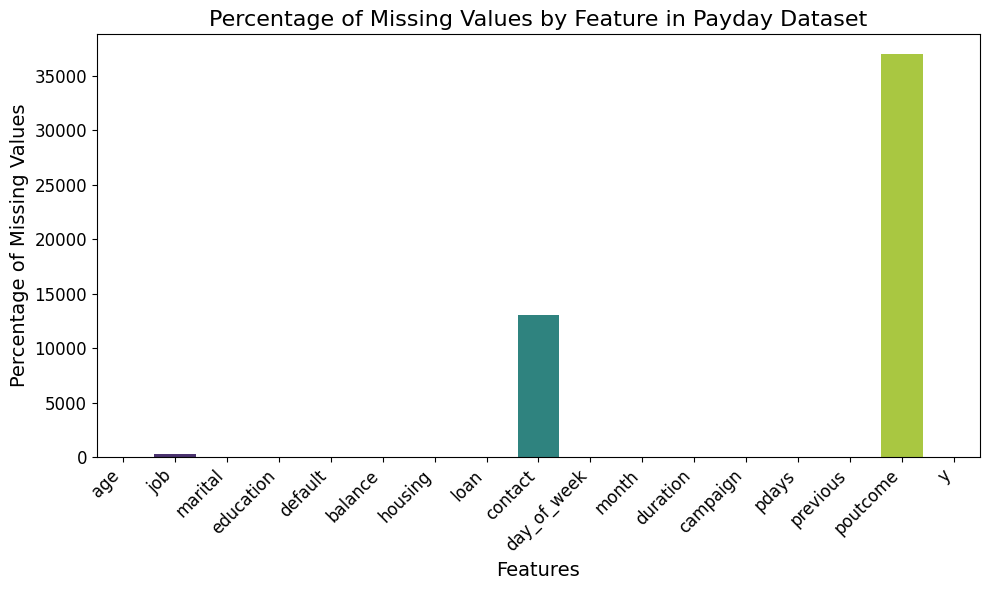

In [8]:
#df_features = df_features.drop(['poutcome', 'contact', 'job'], axis=1)
plot_missing_vales(df_features)

(-1.0999999997564163,
 1.0999999955583182,
 -1.0999997719850683,
 1.0999997933240215)

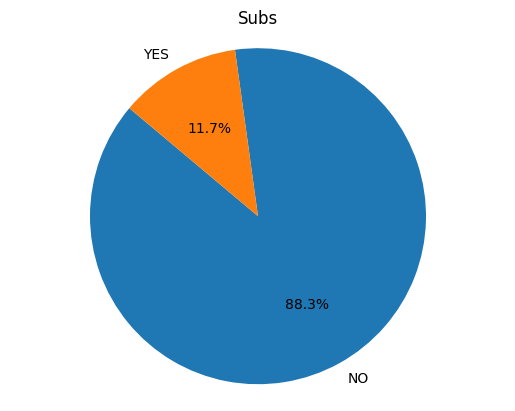

In [9]:
subs_cnt = df_features["y"].value_counts()
plt.pie(subs_cnt, labels=['NO', 'YES'], autopct='%1.1f%%', startangle=140)
plt.title("Subs")
plt.axis('equal')

<Figure size 1000x800 with 0 Axes>

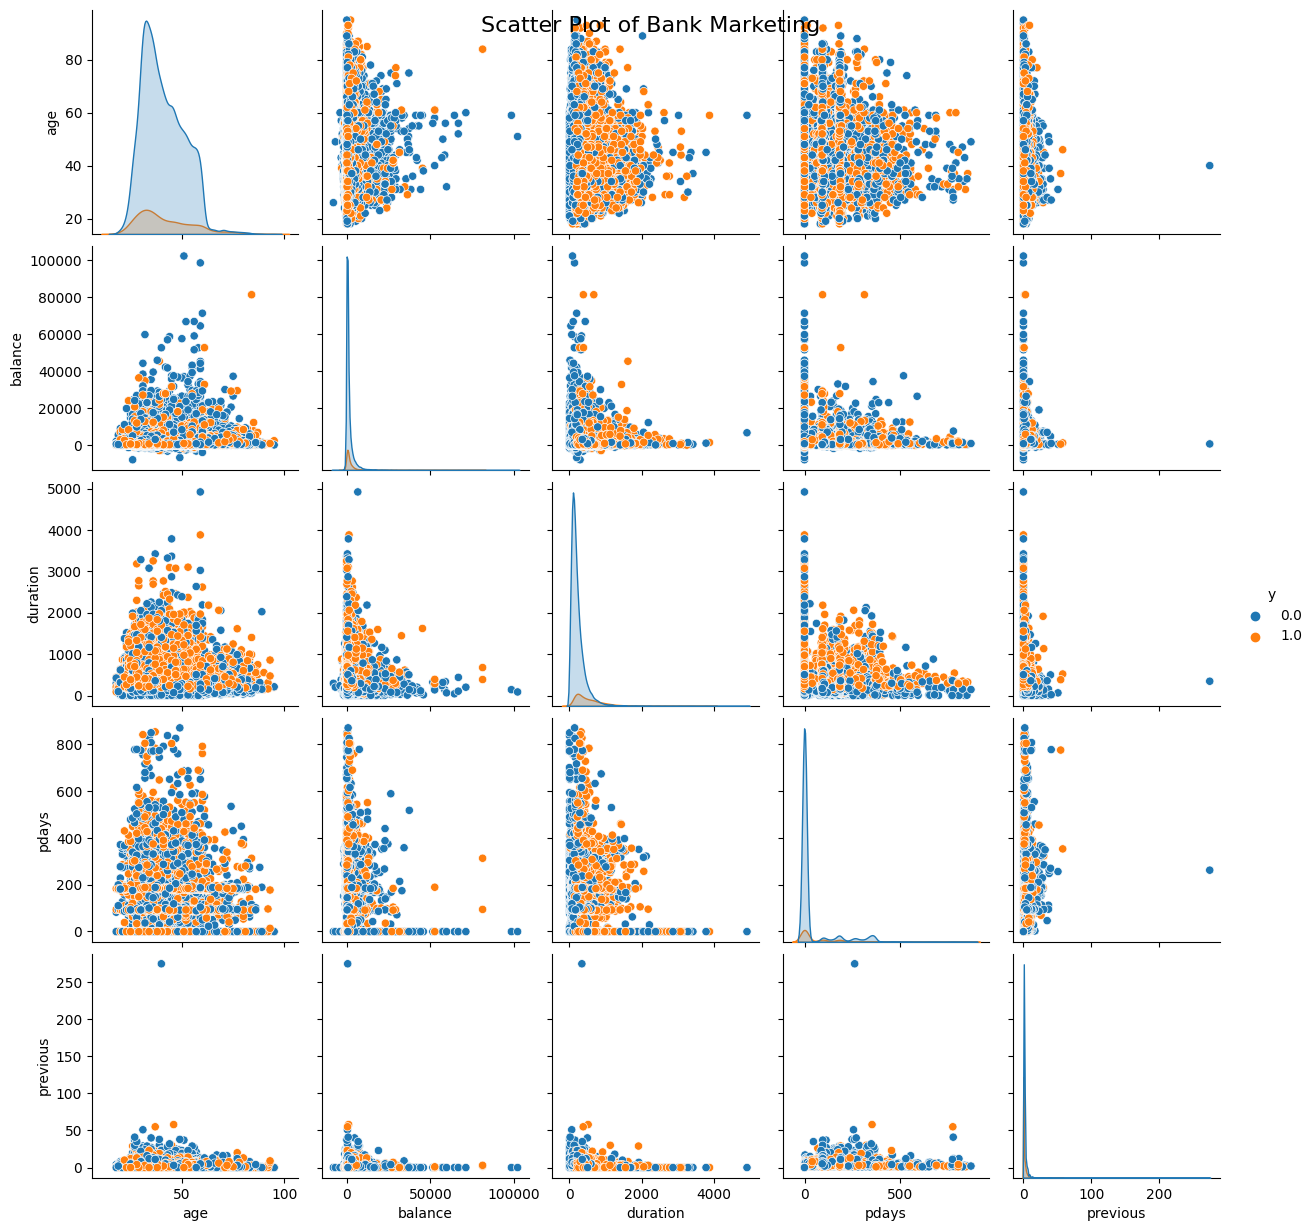

In [10]:
plt.figure(figsize=(10, 8))
col_name = ['y', 'age', 'balance',
            'duration',	'pdays', 'previous' ]
features = df_features[col_name].astype(float)
sns.pairplot(data=features, hue="y")
plt.suptitle("Scatter Plot of Bank Marketing", fontsize=16)
plt.show()

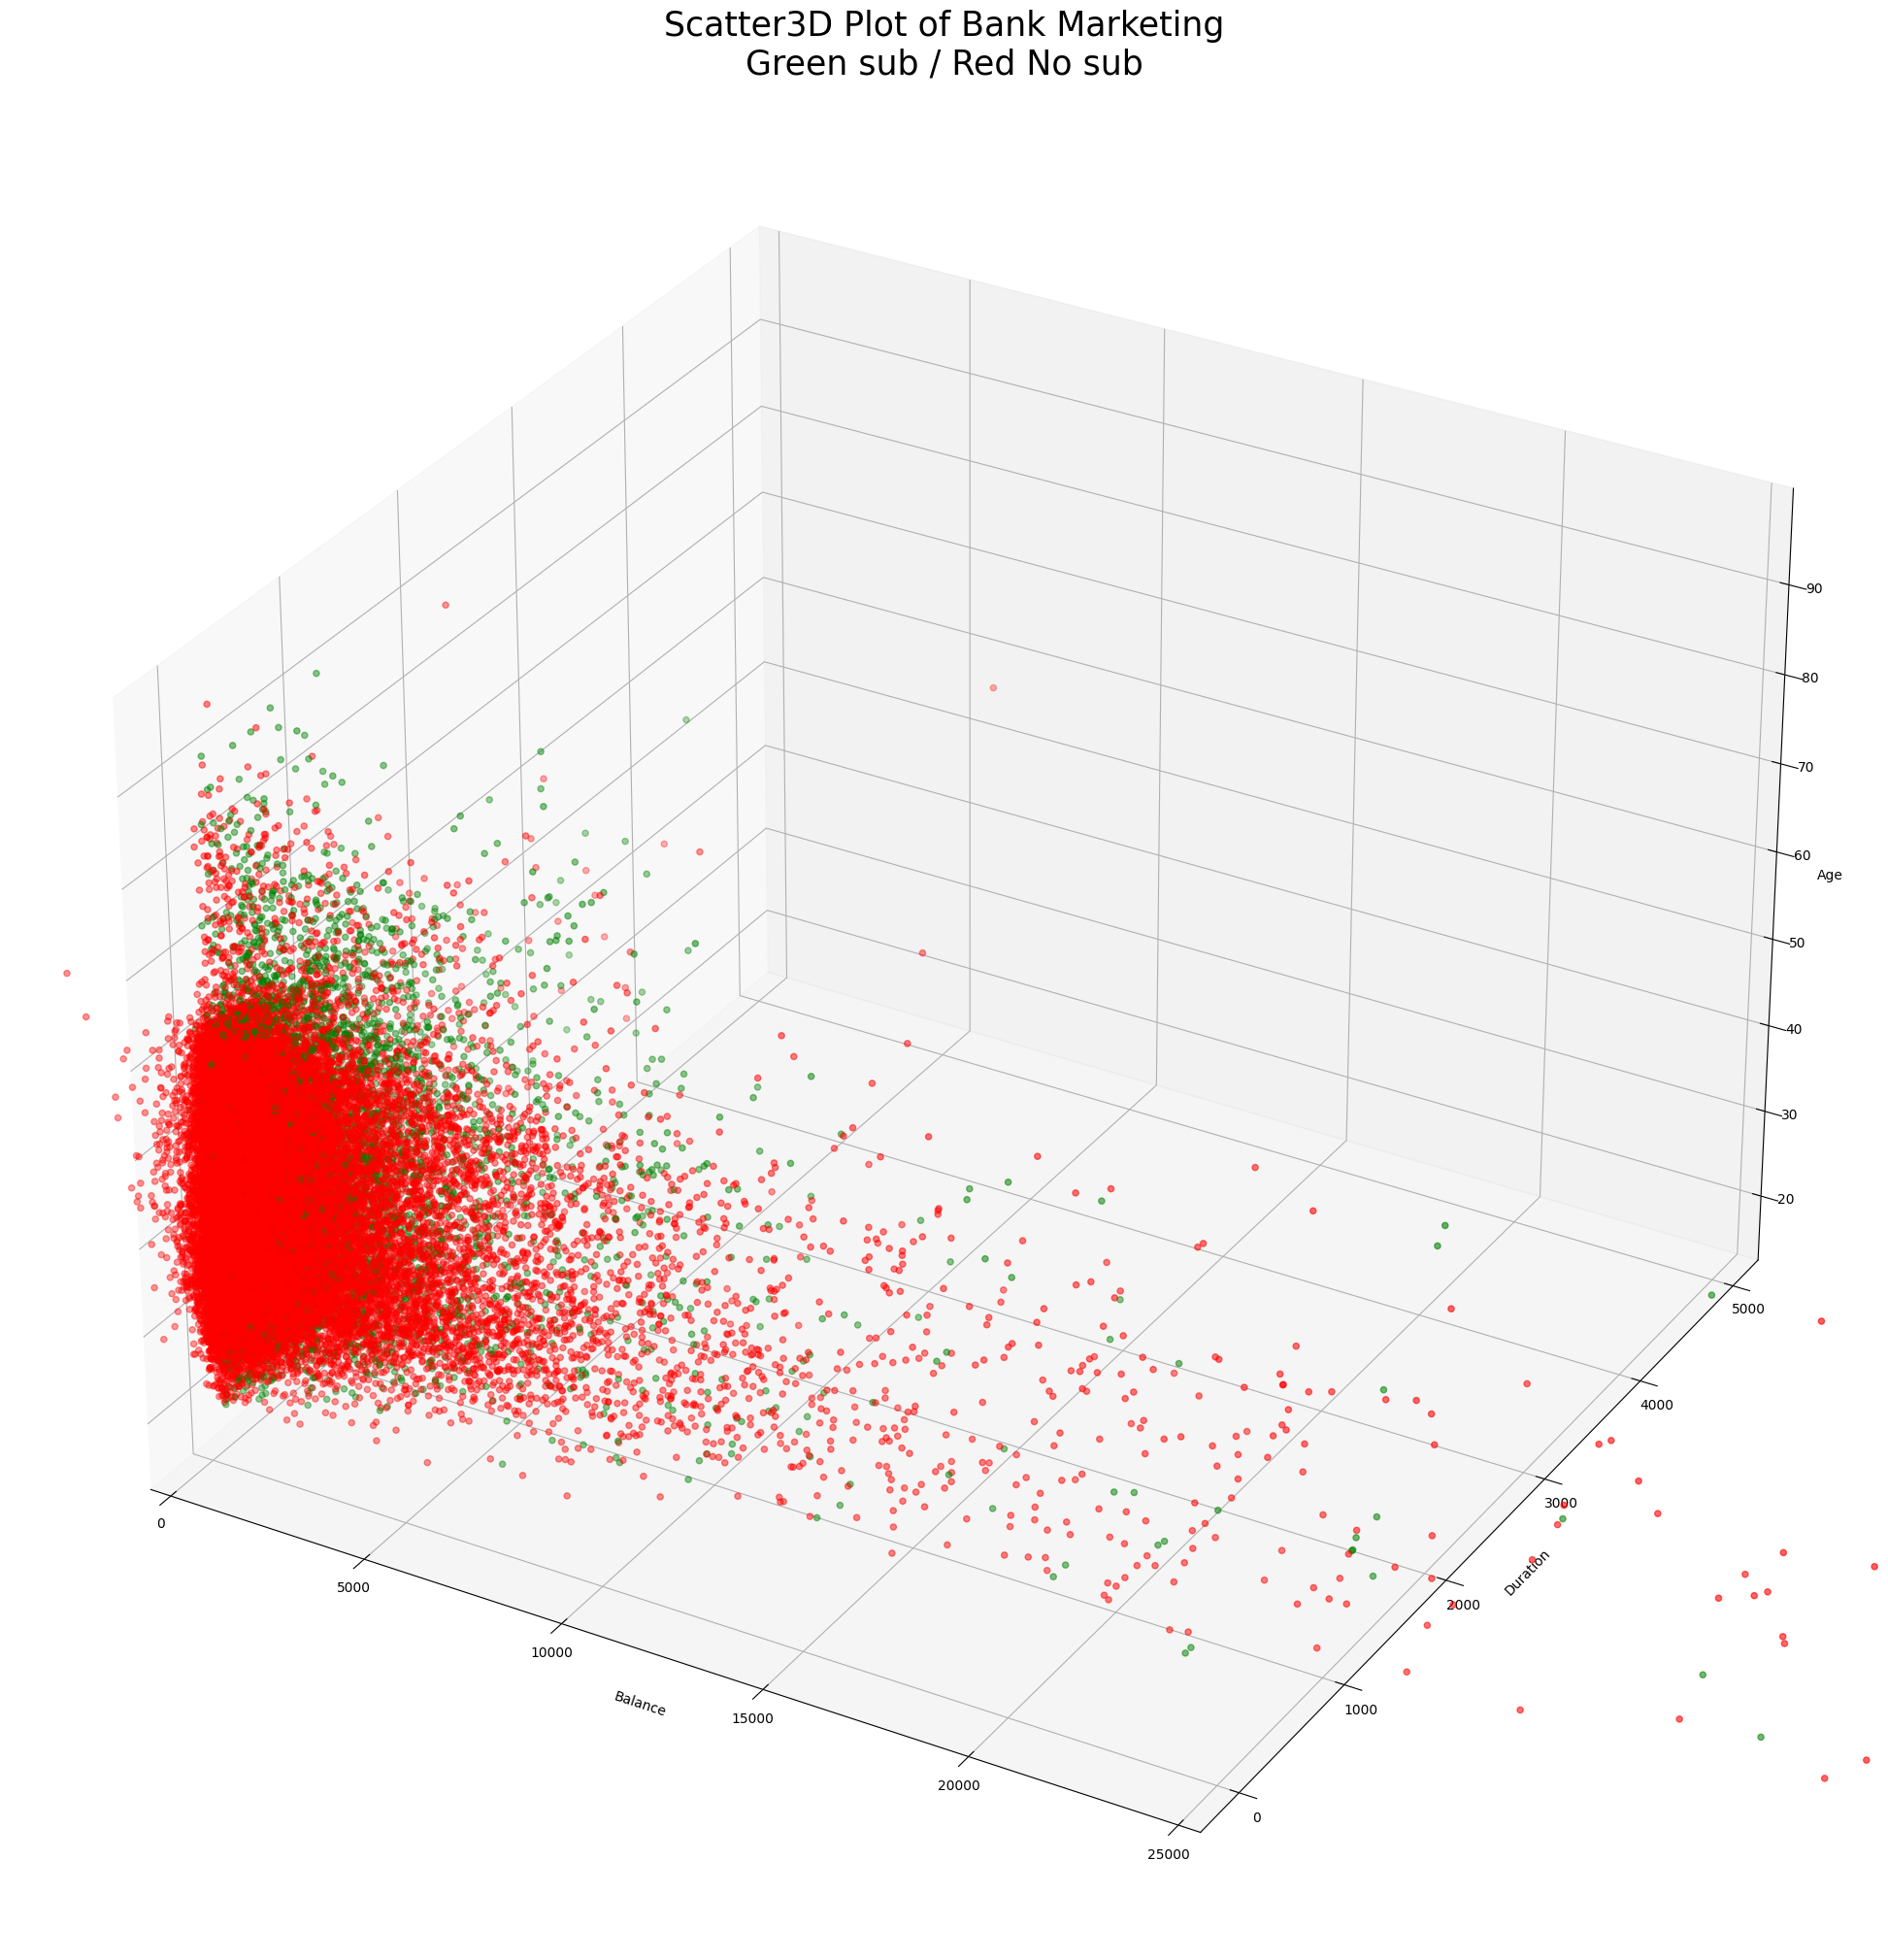

In [11]:
col = np.where(df_features['y'] == 0, 'r', 'g')
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_features['balance'], df_features['duration'], df_features['age'], color=col)
ax.set_xlim(0, 25000)
ax.set_xlabel('Balance')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
ax.set_title('Scatter3D Plot of Bank Marketing\nGreen sub / Red No sub', fontdict={'size': 25})
plt.show()

In [12]:
# Seaborn box plot for "bill_length_mm"
def ft_boxplot(y_name='balance', range=[-2000, 10000]):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="y", y=y_name, data=df_features, palette="viridis")
    plt.title(y_name.capitalize() + ' - Distribution by sub / no sub')
    plt.xlabel("Subs")
    plt.ylim(range)
    plt.ylabel(y_name)
    plt.xticks([0 , 1], ['yes', 'no'])
    plt.show()

    # Plotly box plot for "bill_length_mm"
    fig = px.box(df_features, x='y', y=y_name, title=y_name.capitalize() + ' - Distribution by sub / no sub')
    fig.update_layout(showlegend=False)
    fig.show()

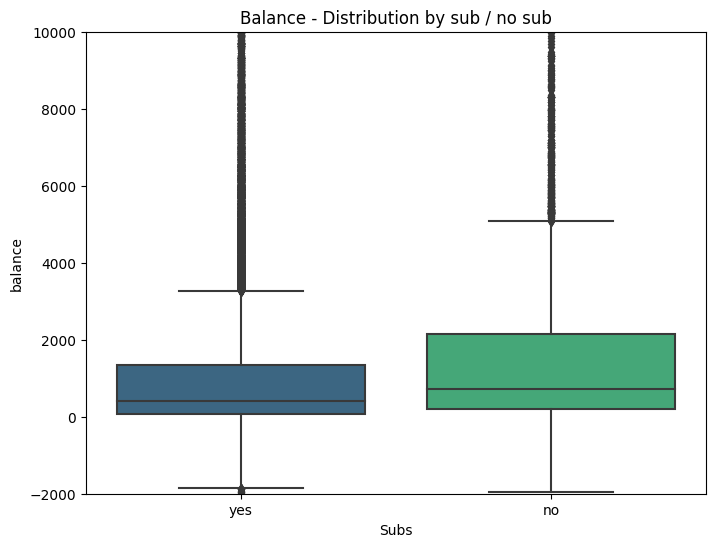

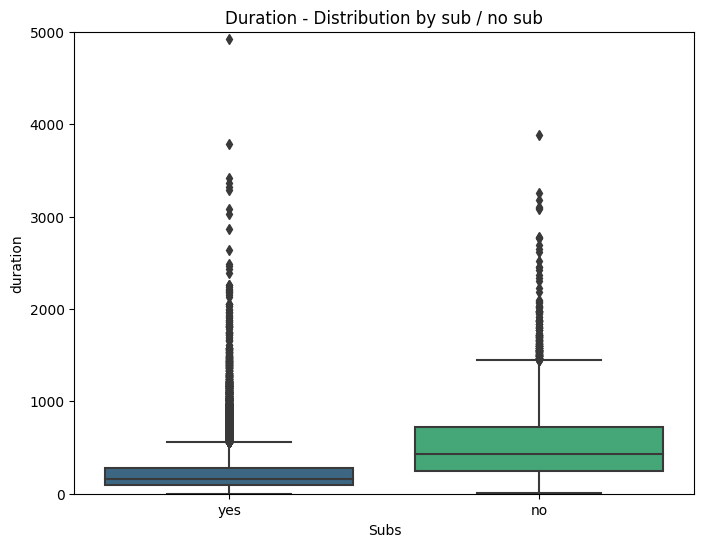

In [13]:
ft_boxplot()
ft_boxplot(y_name='duration', range=[0,5000])

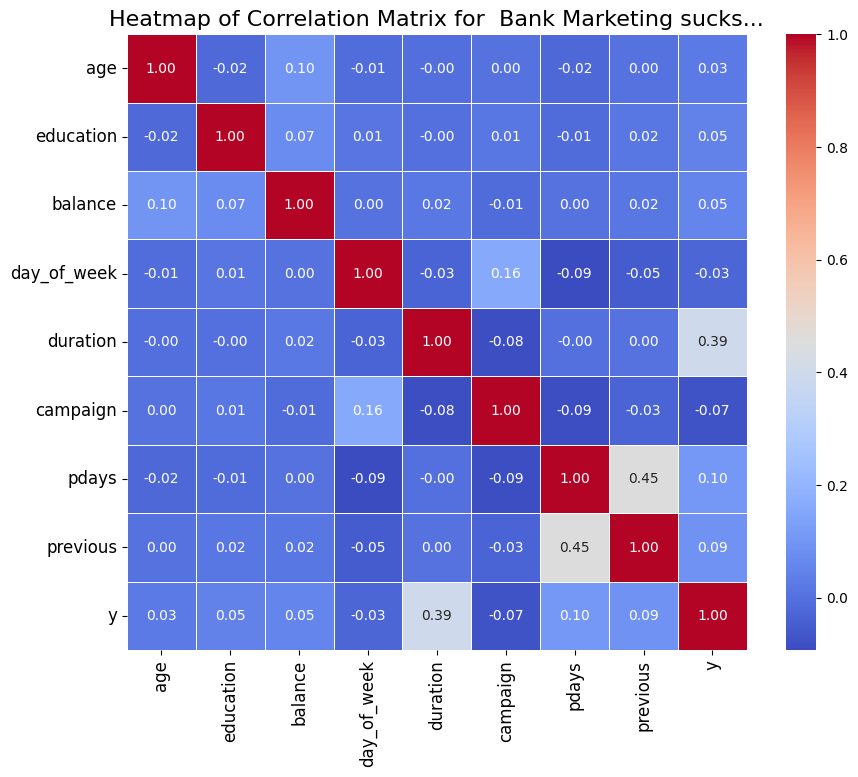

In [14]:
# Correlation matrix for all features, also called Heatmap
corr_matrix = df_features.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix for  Bank Marketing sucks...", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()